In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/content/kc_house_data.csv')
df

id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   
1             2570      7242     2.0           0     0  ...      7   
2              770     10000     1.0           0     0  ...      6   
3             1960      5000     1.0           0     0  ...      7   
4             1680      8080     1.0           0     0  ...      8   
...            ...       ...     ...         ...   ...  ...    ...   
21608         1530      1131     3.0           0     0  ...      8   
21609         2310      5813     2.0           0     0  ...      8   
21610         1020      1350     2.0           0     0  ...      7   
21611         1600      2388     2.0           0     0  ...      8   
21612         1020      1076     2.0           0     0  ...      7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1180              0      1955             0    98178  47.5112   
1            2170            400      1951          1991    98125  47.7210   
2             770              0      1933             0    98028  47.7379   
3            1050            910      1965             0    98136  47.5208   
4            1680              0      1987             0    98074  47.6168   
...           ...            ...       ...           ...      ...      ...   
21608        1530              0      2009             0    98103  47.6993   
21609        2310              0      2014             0    98146  47.5107   
21610        1020              0      2009             0    98144  47.5944   
21611        1600              0      2004             0    98027  47.5345   
21612        1020              0      2008             0    98144  47.5941   

          long  sqft_living15  sqft_lot15  
0     -122.257           1340        5650  
1     -122.319           1690        7639  
2     -122.233           2720        8062  
3     -122.393           1360        5000  
4     -122.045           1800        7503  
...        ...            ...         ...  
21608 -122.346           1530        1509  
21609 -122.362           1830        7200  
21610 -122.299           1020        2007  
21611 -122.069           1410        1287  
21612 -122.299           1020        1357  

[21613 rows x 21 columns]

In [5]:
df.describe().transpose()

count          mean           std           min  \
id             21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price          21613.0  5.400881e+05  3.671272e+05  7.500000e+04   
bedrooms       21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
bathrooms      21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
sqft_living    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
sqft_lot       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
floors         21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
waterfront     21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
view           21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition      21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
grade          21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
sqft_above     21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
sqft_basement  21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built       21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated   21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode        21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat            21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long           21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
sqft_living15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
sqft_lot15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   

                        25%           50%           75%           max  
id             2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price          3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
bedrooms       3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
bathrooms      1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
sqft_living    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
sqft_lot       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
floors         1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
waterfront     0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
view           0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition      3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
grade          7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
sqft_above     1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
sqft_basement  0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built       1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated   0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode        9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat            4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long          -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
sqft_living15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
sqft_lot15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05

In [6]:
df = df.drop('id', axis=1)

In [7]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      20141013T000000  221900.0         3       1.00         1180      5650   
1      20141209T000000  538000.0         3       2.25         2570      7242   
2      20150225T000000  180000.0         2       1.00          770     10000   
3      20141209T000000  604000.0         4       3.00         1960      5000   
4      20150218T000000  510000.0         3       2.00         1680      8080   
...                ...       ...       ...        ...          ...       ...   
21608  20140521T000000  360000.0         3       2.50         1530      1131   
21609  20150223T000000  400000.0         4       2.50         2310      5813   
21610  20140623T000000  402101.0         2       0.75         1020      1350   
21611  20150116T000000  400000.0         3       2.50         1600      2388   
21612  20141015T000000  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [8]:
df['date'] = pd.to_datetime(df['date'])
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0         1.0           0     0          3      7        1180              0   
1         2.0           0     0          3      7        2170            400   
2         1.0           0     0          3      6         770              0   
3         1.0           0     0          5      7        1050            910   
4         1.0           0     0          3      8        1680              0   
...       ...         ...   ...        ...    ...         ...            ...   
21608     3.0           0     0          3      8        1530              0   
21609     2.0           0     0          3      8        2310              0   
21610     2.0           0     0          3      7        1020              0   
21611     2.0           0     0          3      8        1600              0   
21612     2.0           0     0          3      7        1020              0   

       yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0          1955             0    98178  47.5112 -122.257           1340   
1          1951          1991    98125  47.7210 -122.319           1690   
2          1933             0    98028  47.7379 -122.233           2720   
3          1965             0    98136  47.5208 -122.393           1360   
4          1987             0    98074  47.6168 -122.045           1800   
...         ...           ...      ...      ...      ...            ...   
21608      2009             0    98103  47.6993 -122.346           1530   
21609      2014             0    98146  47.5107 -122.362           1830   
21610      2009             0    98144  47.5944 -122.299           1020   
21611      2004             0    98027  47.5345 -122.069           1410   
21612      2008             0    98144  47.5941 -122.299           1020   

       sqft_lot15  
0            5650  
1            7639  
2            8062  
3            5000  
4            7503  
...           ...  
21608        1509  
21609        7200  
21610        2007  
21611        1287  
21612        1357  

[21613 rows x 20 columns]

In [9]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [10]:
df

date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0     2014-10-13  221900.0         3       1.00         1180      5650   
1     2014-12-09  538000.0         3       2.25         2570      7242   
2     2015-02-25  180000.0         2       1.00          770     10000   
3     2014-12-09  604000.0         4       3.00         1960      5000   
4     2015-02-18  510000.0         3       2.00         1680      8080   
...          ...       ...       ...        ...          ...       ...   
21608 2014-05-21  360000.0         3       2.50         1530      1131   
21609 2015-02-23  400000.0         4       2.50         2310      5813   
21610 2014-06-23  402101.0         2       0.75         1020      1350   
21611 2015-01-16  400000.0         3       2.50         1600      2388   
21612 2014-10-15  325000.0         2       0.75         1020      1076   

       floors  waterfront  view  condition  ...  sqft_basement  yr_built  \
0         1.0           0     0          3  ...              0      1955   
1         2.0           0     0          3  ...            400      1951   
2         1.0           0     0          3  ...              0      1933   
3         1.0           0     0          5  ...            910      1965   
4         1.0           0     0          3  ...              0      1987   
...       ...         ...   ...        ...  ...            ...       ...   
21608     3.0           0     0          3  ...              0      2009   
21609     2.0           0     0          3  ...              0      2014   
21610     2.0           0     0          3  ...              0      2009   
21611     2.0           0     0          3  ...              0      2004   
21612     2.0           0     0          3  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0    98103  47.6993 -122.346           1530        1509   
21609             0    98146  47.5107 -122.362           1830        7200   
21610             0    98144  47.5944 -122.299           1020        2007   
21611             0    98027  47.5345 -122.069           1410        1287   
21612             0    98144  47.5941 -122.299           1020        1357   

       year  month  
0      2014     10  
1      2014     12  
2      2015      2  
3      2014     12  
4      2015      2  
...     ...    ...  
21608  2014      5  
21609  2015      2  
21610  2014      6  
21611  2015      1  
21612  2014     10  

[21613 rows x 22 columns]

In [11]:
df = df.drop(['date'], axis=1)

In [12]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      7  ...              0      1955   
1               0     0          3      7  ...            400      1951   
2               0     0          3      6  ...              0      1933   
3               0     0          5      7  ...            910      1965   
4               0     0          3      8  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21608           0     0          3      8  ...              0      2009   
21609           0     0          3      8  ...              0      2014   
21610           0     0          3      7  ...              0      2009   
21611           0     0          3      8  ...              0      2004   
21612           0     0          3      7  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98178  47.5112 -122.257           1340        5650   
1              1991    98125  47.7210 -122.319           1690        7639   
2                 0    98028  47.7379 -122.233           2720        8062   
3                 0    98136  47.5208 -122.393           1360        5000   
4                 0    98074  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0    98103  47.6993 -122.346           1530        1509   
21609             0    98146  47.5107 -122.362           1830        7200   
21610             0    98144  47.5944 -122.299           1020        2007   
21611             0    98027  47.5345 -122.069           1410        1287   
21612             0    98144  47.5941 -122.299           1020        1357   

       year  month  
0      2014     10  
1      2014     12  
2      2015      2  
3      2014     12  
4      2015      2  
...     ...    ...  
21608  2014      5  
21609  2015      2  
21610  2014      6  
21611  2015      1  
21612  2014     10  

[21613 rows x 21 columns]

In [13]:
df['zipcode'].nunique()

70

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['zipcode'] = le.fit_transform(df['zipcode'])

df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      7  ...              0      1955   
1               0     0          3      7  ...            400      1951   
2               0     0          3      6  ...              0      1933   
3               0     0          5      7  ...            910      1965   
4               0     0          3      8  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21608           0     0          3      8  ...              0      2009   
21609           0     0          3      8  ...              0      2014   
21610           0     0          3      7  ...              0      2009   
21611           0     0          3      8  ...              0      2004   
21612           0     0          3      7  ...              0      2008   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0       66  47.5112 -122.257           1340        5650   
1              1991       55  47.7210 -122.319           1690        7639   
2                 0       16  47.7379 -122.233           2720        8062   
3                 0       58  47.5208 -122.393           1360        5000   
4                 0       37  47.6168 -122.045           1800        7503   
...             ...      ...      ...      ...            ...         ...   
21608             0       42  47.6993 -122.346           1530        1509   
21609             0       60  47.5107 -122.362           1830        7200   
21610             0       59  47.5944 -122.299           1020        2007   
21611             0       15  47.5345 -122.069           1410        1287   
21612             0       59  47.5941 -122.299           1020        1357   

       year  month  
0      2014     10  
1      2014     12  
2      2015      2  
3      2014     12  
4      2015      2  
...     ...    ...  
21608  2014      5  
21609  2015      2  
21610  2014      6  
21611  2015      1  
21612  2014     10  

[21613 rows x 21 columns]

In [15]:
df['yr_renovated'].value_counts()

0       20699
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [16]:
df['renovated'] = df['yr_renovated'].apply(lambda x: 0 if x == 0 else 1)

In [17]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  yr_built  yr_renovated  \
0               0     0          3      7  ...      1955             0   
1               0     0          3      7  ...      1951          1991   
2               0     0          3      6  ...      1933             0   
3               0     0          5      7  ...      1965             0   
4               0     0          3      8  ...      1987             0   
...           ...   ...        ...    ...  ...       ...           ...   
21608           0     0          3      8  ...      2009             0   
21609           0     0          3      8  ...      2014             0   
21610           0     0          3      7  ...      2009             0   
21611           0     0          3      8  ...      2004             0   
21612           0     0          3      7  ...      2008             0   

       zipcode      lat     long  sqft_living15  sqft_lot15  year  month  \
0           66  47.5112 -122.257           1340        5650  2014     10   
1           55  47.7210 -122.319           1690        7639  2014     12   
2           16  47.7379 -122.233           2720        8062  2015      2   
3           58  47.5208 -122.393           1360        5000  2014     12   
4           37  47.6168 -122.045           1800        7503  2015      2   
...        ...      ...      ...            ...         ...   ...    ...   
21608       42  47.6993 -122.346           1530        1509  2014      5   
21609       60  47.5107 -122.362           1830        7200  2015      2   
21610       59  47.5944 -122.299           1020        2007  2014      6   
21611       15  47.5345 -122.069           1410        1287  2015      1   
21612       59  47.5941 -122.299           1020        1357  2014     10   

       renovated  
0              0  
1              1  
2              0  
3              0  
4              0  
...          ...  
21608          0  
21609          0  
21610          0  
21611          0  
21612          0  

[21613 rows x 22 columns]

In [18]:
df = df.drop(['yr_renovated'], axis=1)

In [19]:
df

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      7  ...              0      1955   
1               0     0          3      7  ...            400      1951   
2               0     0          3      6  ...              0      1933   
3               0     0          5      7  ...            910      1965   
4               0     0          3      8  ...              0      1987   
...           ...   ...        ...    ...  ...            ...       ...   
21608           0     0          3      8  ...              0      2009   
21609           0     0          3      8  ...              0      2014   
21610           0     0          3      7  ...              0      2009   
21611           0     0          3      8  ...              0      2004   
21612           0     0          3      7  ...              0      2008   

       zipcode      lat     long  sqft_living15  sqft_lot15  year  month  \
0           66  47.5112 -122.257           1340        5650  2014     10   
1           55  47.7210 -122.319           1690        7639  2014     12   
2           16  47.7379 -122.233           2720        8062  2015      2   
3           58  47.5208 -122.393           1360        5000  2014     12   
4           37  47.6168 -122.045           1800        7503  2015      2   
...        ...      ...      ...            ...         ...   ...    ...   
21608       42  47.6993 -122.346           1530        1509  2014      5   
21609       60  47.5107 -122.362           1830        7200  2015      2   
21610       59  47.5944 -122.299           1020        2007  2014      6   
21611       15  47.5345 -122.069           1410        1287  2015      1   
21612       59  47.5941 -122.299           1020        1357  2014     10   

       renovated  
0              0  
1              1  
2              0  
3              0  
4              0  
...          ...  
21608          0  
21609          0  
21610          0  
21611          0  
21612          0  

[21613 rows x 21 columns]

In [20]:
X = df.drop(['price'], axis=1)
y = df['price'].values

In [21]:
y

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
y_train

array([807100., 570000., 320000., ..., 575000., 245000., 315000.])

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train.shape

(15129, 20)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

model = Sequential([
    layers.Dense(256, 'relu'),
    layers.Dense(512, 'relu'),
    layers.Dense(1024, 'relu'),
    layers.Dense(2048, 'relu'),
    layers.Dense(1)
])

model.compile(loss='mse', optimizer='adam')
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
473/473 [==============================] - 2s 4ms/step - loss: 100909047808.0000 - val_loss: 46235193344.0000
Epoch 2/100
473/473 [==============================] - 2s 3ms/step - loss: 37544759296.0000 - val_loss: 38420680704.0000
Epoch 3/100
473/473 [==============================] - 2s 3ms/step - loss: 32736602112.0000 - val_loss: 38775554048.0000
Epoch 4/100
473/473 [==============================] - 2s 3ms/step - loss: 30787919872.0000 - val_loss: 38489174016.0000
Epoch 5/100
473/473 [==============================] - 2s 3ms/step - loss: 28958085120.0000 - val_loss: 41137565696.0000
Epoch 6/100
473/473 [==============================] - 2s 3ms/step - loss: 27500886016.0000 - val_loss: 32935157760.0000
Epoch 7/100
473/473 [==============================] - 2s 3ms/step - loss: 26622070784.0000 - val_loss: 33135884288.0000
Epoch 8/100
473/473 [==============================] - 2s 3ms/step - loss: 25118474240.0000 - val_loss: 31089459200.0000
Epoch 9/100
473/473 [==========

In [34]:
loss_df = pd.DataFrame(model.history.history)

In [35]:
loss_df

loss      val_loss
0   1.009090e+11  4.623519e+10
1   3.754476e+10  3.842068e+10
2   3.273660e+10  3.877555e+10
3   3.078792e+10  3.848917e+10
4   2.895809e+10  4.113757e+10
..           ...           ...
95  1.038239e+10  1.900682e+10
96  9.359289e+09  1.761173e+10
97  9.990836e+09  1.757802e+10
98  9.737694e+09  1.964482e+10
99  9.559020e+09  1.620574e+10

[100 rows x 2 columns]

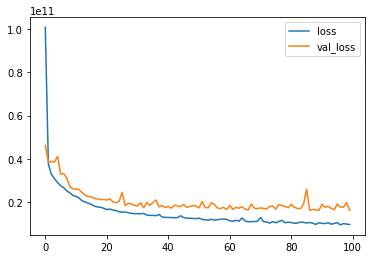

In [36]:
loss_df.plot()

In [38]:
model.evaluate(X_test, y_test)

203/203 [==============================] - 0s 2ms/step - loss: 16205741056.0000


16205741056.0

In [39]:
model.evaluate(X_train, y_train)

473/473 [==============================] - 1s 2ms/step - loss: 8807118848.0000


8807118848.0

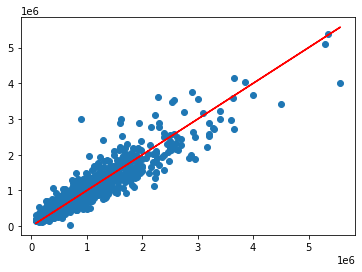

In [42]:
predictions = model.predict(X_test)
plt.plot(y_test, y_test, color='r')
plt.scatter(y_test, predictions)